#BIBLIOTECAS


In [ ]:
#usado para usar no Colab R
install.packages('zoo', repos='http://cran.rstudio.com/')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
if(!require(dplyr)) install.packages("dplyr", repos = "http://cran.us.r-project.org")
if(!require(ggplot2)) install.packages("ggplot2", repos = "http://cran.us.r-project.org")
if(!require(readxl)) install.packages("readxl", repos = "http://cran.us.r-project.org")
if(!require(reshape2)) install.packages("reshape2", repos = "http://cran.us.r-project.org")


Loading required package: reshape2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [ ]:
install.packages("reshape2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("scales")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages(c("Hmisc"))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(ggplot2)
library(readr)
library(Hmisc)
library(tidyr)
library(scales)


#PARTE 1

**Data**: Indica o momento em que os dados foram registrados.
Total long-term: Mostra o fluxo líquido total de novos caixas para todos os investimentos de longo prazo.

Fluxo de Caixa Líquido Total: Representa o movimento líquido total de dinheiro entrando e saindo dos fundos.

**Equity**: Ações Dividido em “Total equity”, que é subdividido em “Domestic” (equity doméstico total) e “World” (equity mundial total). O equity doméstico inclui subcategorias como “Large cap”, “Mid cap”, “Small cap”, “Multi cap” e “Other”. O equity mundial é dividido em “Developed markets” (mercados desenvolvidos) e “Emerging markets” (mercados emergentes).

**Hybrid**:Híbridos Provavelmente representa fundos híbridos que combinam valores mobiliários de equity e renda fixa.

**Bond**: Títulos Há uma divisão em “Total bond”, seguido por “Taxable” (títulos tributáveis), que inclui subcategorias como “Investment grade” (grau de investimento), “High yield” (alto rendimento), “Government” (governamentais), “Multisector” (multissetoriais) e “Global”. Há também uma coluna para “Municipal” (municipais).


##CLEAN DATA

In [ ]:
# Carregar os dados
dados <- read_excel('mutual_funds_cash_flow.xlsx',skip = 6)
dados <- dados %>% na.omit() #Remover linhas com valores em falta
dados <- dados %>% distinct() #Remover linhas duplicadas

# Função para contar NAs em cada coluna
contar_NAs <- function(df) {
  sapply(df, function(x) sum(is.na(x)))
}
na_count <- contar_NAs(dados)
print(na_count)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...13`
• `` -> `...14`
• `` -> `...21`


             ...1              ...2              ...3    Total domestic 
                0                 0                 0                 0 
        Large cap           Mid cap         Small cap         Multi cap 
                0                 0                 0                 0 
            Other       Total world Developed markets  Emerging markets 
                0                 0                 0                 0 
            ...13             ...14     Total taxable  Investment grade 
                0                 0                 0                 0 
       High yield        Government       Multisector            Global 
                0                 0                 0                 0 
            ...21 
                0 


In [ ]:
# Converter para data frame
dados <- as.data.frame(dados)

# Renomear colunas
colnames(dados) <- c("Date", "Long-term", "equity", "domestic", "Large", "Mid", "Small", "Multi", "Other", "Totalworld", "Developed", "Emerging", "Hybrid", "bond", "taxable", "Investment", "Highyield", "Government", "Multisector", "Global", "Municipal")

# data formato
dados$Date <- as.Date(dados$Date, format="%m/%d/%Y")


head(dados)


,Date,Long-term,equity,domestic,Large,Mid,Small,Multi,Other,Totalworld,⋯,Emerging,Hybrid,bond,taxable,Investment,Highyield,Government,Multisector,Global,Municipal
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-31,40024,-7072,-24523,-6847,-5281,-2117,-9993,-286,17451,⋯,4201,75,47020,36937,22304,-967,1297,5373,8929,10083
2,2018-02-28,-11931,-8367,-19556,-1574,-2853,-2634,-9492,-3003,11189,⋯,1739,-3612,48,1133,6767,-8976,121,2867,354,-1085
3,2018-03-31,9844,266,-12007,447,-2819,-1600,-6676,-1358,12273,⋯,1047,-1999,11577,10081,5384,-393,800,1993,2297,1496
4,2018-04-30,-6666,-9290,-12662,-641,-1123,-104,-4022,-6771,3372,⋯,1756,-3913,6537,8492,310,3081,218,2243,2641,-1956
5,2018-05-31,-5533,-8734,-15718,-5557,-4417,544,-5219,-1068,6984,⋯,1194,-3822,7023,6287,3583,-237,-1113,1961,2093,736
6,2018-06-30,-16234,-19894,-24287,-15433,-2707,1453,-6302,-1298,4392,⋯,-413,-7155,10814,9450,2165,961,1303,4571,449,1364


##ANALISE EXPLORATÓRIA DE DADOS

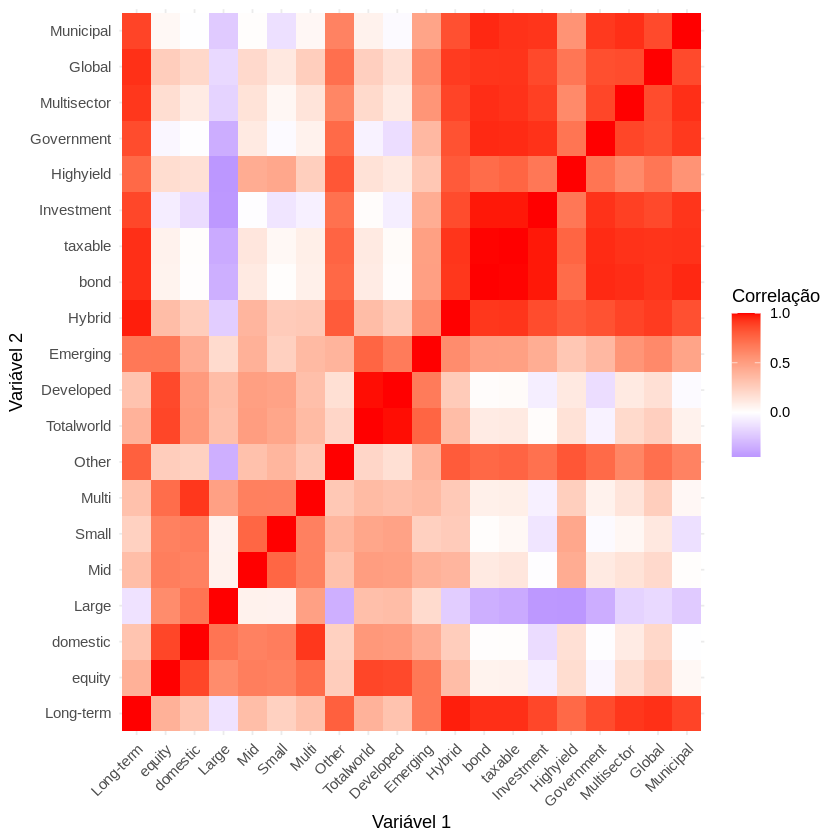

In [ ]:
dados_numericos <- dados[sapply(dados, is.numeric)]

# Calcular a matriz de correlação
cor_matrix <- cor(dados_numericos)

dados_melted <- melt(cor_matrix)
ggplot(dados_melted, aes(Var1, Var2, fill=value)) +
  geom_tile() +
  scale_fill_gradient2(midpoint=0, low="blue", high="red", mid="white") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle=45, vjust=1, size=9, hjust=1),
        axis.text.y = element_text(size=9)) +
  labs(x='Variável 1', y='Variável 2', fill='Correlação')


In [ ]:
library(dplyr)
library(ggplot2)

# Ajustar os rótulos dos meses e anos
dados_pivot$Year <- format(dados_pivot$Date, "%Y")
dados_pivot$Month <- format(dados_pivot$Date, "%b")

# Converter 'Month' para um fator com os níveis na ordem correta
dados_pivot$Month <- factor(dados_pivot$Month, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

# Agrupar os dados por tipo de título e calcular a soma dos fluxos de caixa
sumario <- dados_pivot %>%
  group_by(Year, Month, BondType) %>%
  dplyr::summarize(TotalCashFlow = sum(CashFlow, na.rm = TRUE))

# Imprimir o sumário
print(sumario)

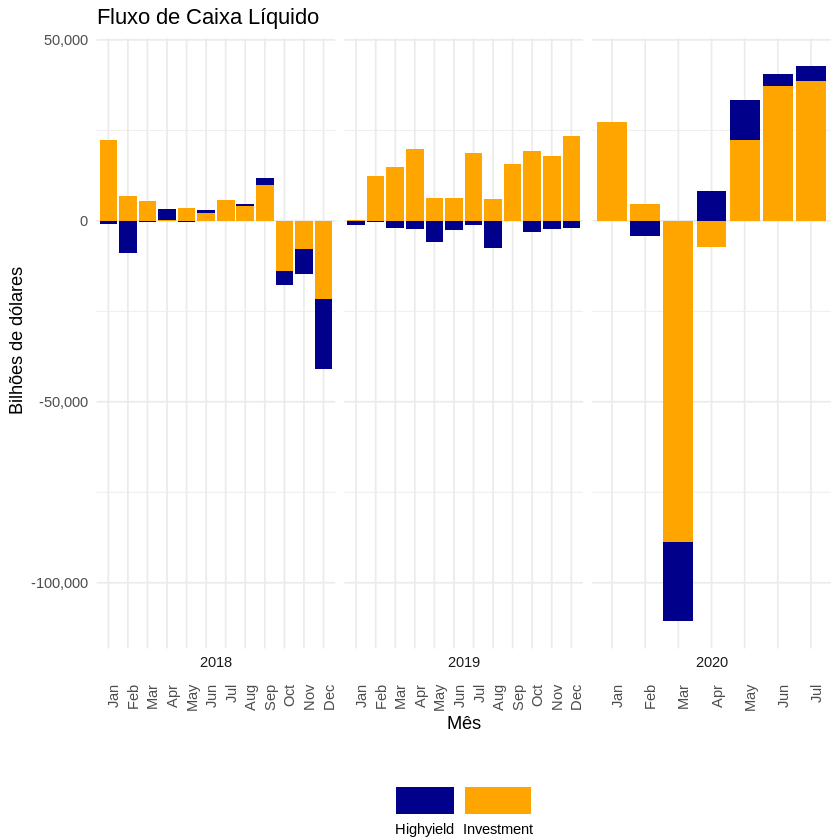

In [ ]:
# Criar o gráfico com as barras empilhadas e separar por ano e mês na mesma linha
ggplot(sumario, aes(x = Month, y = TotalCashFlow, fill = BondType)) +
  geom_bar(stat = "identity", position = "stack", width = 0.9) +
  scale_fill_manual(values = c("Investment" = "orange", "Highyield" = "darkblue")) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Fluxo de Caixa Líquido",
       x = "Mês", y = " Bilhões de dólares",
       fill = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        legend.position = "bottom",
        legend.box = "vertical",
        legend.box.margin = margin(6, 6, 6, 6),
        legend.margin = margin(0, 0, -10, 0)) +
  guides(fill = guide_legend(nrow = 1, title.position = "top", label.position = "bottom")) +
  facet_wrap(~Year, scales = "free_x", strip.position = "bottom")


#PARTE 2

##CLEAN DATA

In [ ]:
# Carregar os dados
dados <- read_excel('/content/treasury_futures.xlsx')
dados <- dados %>% na.omit() #Remover linhas com valores em falta
dados <- dados %>% distinct() #Remover linhas duplicadas

# Função para contar NAs em cada coluna
contar_NAs <- function(df) {
  sapply(df, function(x) sum(is.na(x)))
}
na_count <- contar_NAs(dados)
print(na_count)



# Carregar os dados
dados1 <- read_excel("/content/treasury_futures.xlsx", sheet = "Sheet1")
dados1 <- dados1 %>% na.omit() #Remover linhas com valores em falta
dados1 <- dados1 %>% distinct() #Remover linhas duplicadas

# Função para contar NAs em cada coluna
contar_NAs <- function(df) {
  sapply(df, function(x) sum(is.na(x)))
}
na_count <- contar_NAs(dados1)
print(na_count)





          date       short2Yr        long2Yr       short5Yr        long5Yr 
             0              0              0              0              0 
     short10Yr       long10Yr ultraShort10Yr  ultraLong10Yr      shortBond 
             0              0              0              0              0 
      longBond ultraShortBond  ultraLongBond 
             0              0              0 
                 Date        2-year - Short         2-year - Long 
                    0                     0                     0 
       5-year - Short         5-year - Long       10-year - Short 
                    0                     0                     0 
       10-year - Long 10-year ULTRA - Short  10-year ULTRA - Long 
                    0                     0                     0 
         Bond - Short           Bond - Long    Bond ULTRA - Short 
                    0                     0                     0 
    Bond ULTRA - Long 
                    0 


##ANALISE EXPLORTÓRIA DE DADOS

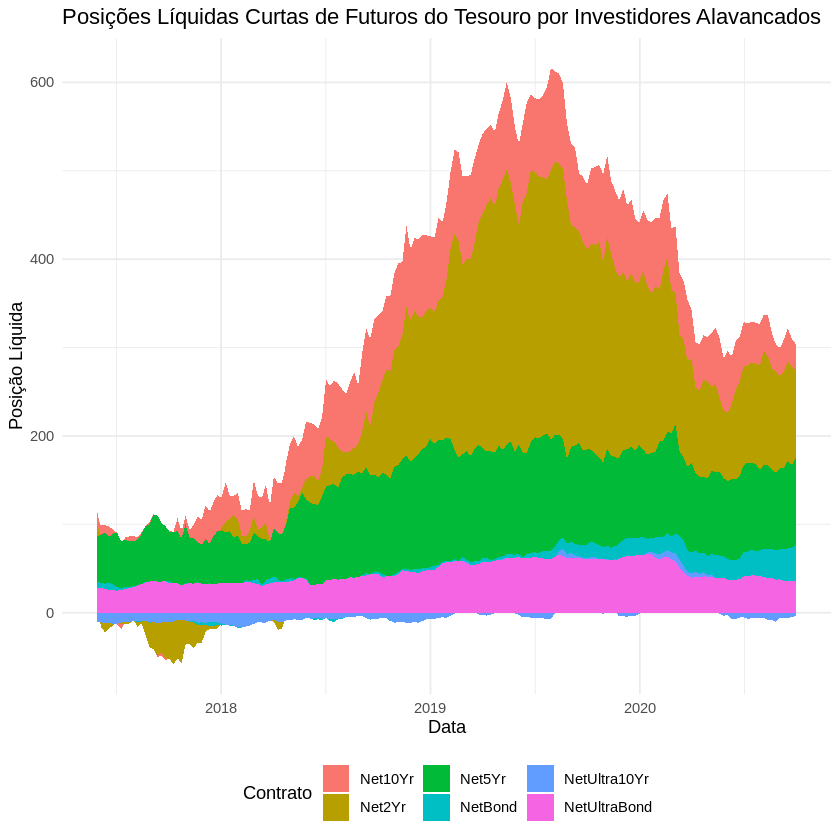

In [ ]:
# Carregar as bibliotecas necessárias
library(ggplot2)
library(dplyr)
library(tidyr)

# Suponha que 'dados' é o seu dataframe e você tem as seguintes colunas:
# date, short2Yr, long2Yr, short5Yr, long5Yr, short10Yr, long10Yr, ultraShort10Yr, ultraLong10Yr, shortBond, longBond, ultraShortBond, ultraLongBond

# Converter valores para numérico e substituir vírgulas por pontos
dados <- dados %>%
  mutate(across(starts_with('short'), ~ as.numeric(gsub(",", ".", .)))) %>%
  mutate(across(starts_with('long'), ~ as.numeric(gsub(",", ".", .))))

# Calcular posição líquida curta para cada contrato
dados <- dados %>%
  mutate(Net2Yr = short2Yr - long2Yr,
         Net5Yr = short5Yr - long5Yr,
         Net10Yr = short10Yr - long10Yr,
         NetUltra10Yr = ultraShort10Yr - ultraLong10Yr,
         NetBond = shortBond - longBond,
         NetUltraBond = ultraShortBond - ultraLongBond)

# Filtrar apenas os contratos desejados
contratos_desejados <- c("Net2Yr", "Net5Yr", "Net10Yr", "NetUltra10Yr", "NetBond", "NetUltraBond")
dados_filtrados <- dados %>%
  select(date, all_of(contratos_desejados))

# Transformar dados para o formato longo
dados_long <- gather(dados_filtrados, Contract, Net_Position, -date)

# Criar o gráfico de áreas empilhadas com a legenda na parte inferior
grafico_areas <- ggplot(dados_long, aes(x = date, y = Net_Position, fill = Contract)) +
  geom_area(position = 'stack') +
  theme_minimal() +
  labs(x = 'Data', y = 'Bilhões', fill = 'Contrato',
       title = 'Posições Líquidas Curtas de Futuros do Tesouro por Investidores Alavancados') +
  theme(legend.position = "bottom") # Mover a legenda para a parte inferior

# Exibir o gráfico
print(grafico_areas)


In [ ]:
# Calcular a média e o desvio padrão das mudanças semanais
sumario <- dados %>%
  summarise(across(starts_with("net_change"),
                   list(mean = ~ mean(.x, na.rm = TRUE),
                        sd = ~ sd(.x, na.rm = TRUE)), .names = "{.col}_{.fn}"))

# Encontrar o contrato com a maior média
contrato_maior_media <- names(which.max(sumario[grepl("_mean$", names(sumario))]))

# Encontrar o contrato mais volátil
contrato_mais_volatil <- names(which.max(sumario[grepl("_sd$", names(sumario))]))

# Imprimir os resultados
print(sumario)
print(paste("Contrato com a maior média:", contrato_maior_media))
print(paste("Contrato mais volátil:", contrato_mais_volatil))


# A tibble: 1 × 0
[1] "Contrato com a maior média: "
[1] "Contrato mais volátil: "
